# IMPORTING TENSORFLOW


In [220]:
!pip install tensorflow

# IMPORTING TENSORFLOW

In [221]:
import tensorflow as tf

# USING CPU


In [222]:
device = "/device:CPU:0"

# DATA IMPORTING 

In [223]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import math

dir_example = "Data"

classes = os.listdir(dir_example)
print(classes)

['Test', 'Train']


In [224]:
dir_example = "Data/Train"

train_classes = os.listdir(dir_example)
print(train_classes)

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


# DATA VISUALIZATION

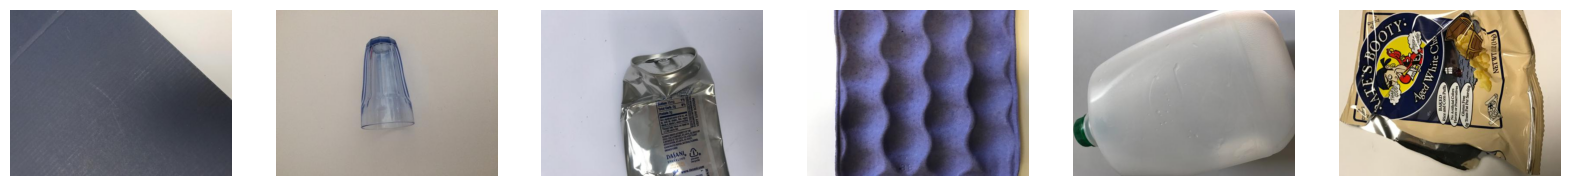

In [225]:
dir_with_examples = 'visualize'
files_per_row = 6
files_in_dir = os.listdir(dir_with_examples)
number_of_cols = files_per_row
number_of_rows = int(len(files_in_dir) / number_of_cols)

# Generate the subplots
fig, axs = plt.subplots(number_of_rows, number_of_cols)
fig.set_size_inches(20, 15, forward=True)

# Map each file to subplot
try:
  for i in range(0, len(files_in_dir)):
    file_name = files_in_dir[i]
    image = Image.open(f'{dir_with_examples}/{file_name}')
    row = math.floor(i / files_per_row)
    col = i % files_per_row
    axs[col].imshow(image)
    axs[col].axis('off')
except:
  pass
# Show the plot
plt.show()

In [226]:
from tensorflow.keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, SpatialDropout2D
from tensorflow.keras.losses import sparse_categorical_crossentropy, binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# PREPARING OF DATA 

In [227]:
train = 'Data/Train'
test = 'Data/Test'

In [228]:
train_generator = ImageDataGenerator(rescale = 1/255)

train_generator = train_generator.flow_from_directory(train,
                                                      target_size = (300,300),
                                                      batch_size = 32,
                                                      class_mode = 'sparse')

labels = (train_generator.class_indices)
print(labels,'\n')

labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 2660 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5} 

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


In [229]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((32, 300, 300, 3), (32,))

In [230]:
test_generator = ImageDataGenerator(rescale = 1./255)

test_generator = test_generator.flow_from_directory(test,
                                                    target_size = (300,300),
                                                    batch_size = 32,
                                                    class_mode = 'sparse')

test_labels = (test_generator.class_indices)
print(test_labels,'\n')

test_labels = dict((v,k) for k,v in test_labels.items())
print(test_labels)

Found 344 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5} 

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}


# LABELING 

In [231]:
print(train_generator.class_indices)
Labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('Labels.txt', 'w') as file:
  file.write(Labels)

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


# CREATING MODEL WITH oneDNN OPTIMIZATION 

In [232]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '1'

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# Convolution blocks
model.add(Conv2D(32, kernel_size=(3,3), padding='same', input_shape=(300,300,3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

# Classification layers
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(6, activation='softmax'))





# COMPILING MODEL  # Enable OneDNN optimizations

In [233]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)              │ (None, 300, 300, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 150, 150, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 150, 150, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 75, 75, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 43808)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 64)             │     2,803,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,843,910 (10.85 MB)

 Trainable params: 2,843,910 (10.85 MB)

 Non-trainable params: 0 (0.00 B)

In [234]:
from PIL import Image
import os

# Assuming your images are in a directory 'images'
image_dir = 'images'
for filename in os.listdir(image_dir):
    filepath = os.path.join(image_dir, filename)
    # Open the image
    img = Image.open(filepath)
    # Convert to RGBA if it has transparency
    if img.mode != 'RGBA':
        img = img.convert('RGBA')
        # Save the image back
        img.save(filepath)


In [235]:
from tensorflow.keras.utils import Sequence

class MyDataset(Sequence):
    def __init__(self, data, labels, batch_size, **kwargs):
        super().__init__(**kwargs)
        self.data = data
        self.labels = labels
        self.batch_size = batch_size

    def __len__(self):
        return len(self.data) // self.batch_size

    def __getitem__(self, idx):
        batch_x = self.data[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.labels[idx * self.batch_size:(idx + 1) * self.batch_size]
        return batch_x, batch_y


# TRAINING THE MODEL(10 EPOCHS)

In [236]:
model.fit(train_generator,
          epochs=10,
          steps_per_epoch=2660//32)

Epoch 1/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.3706 - loss: 1.5739
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5312 - loss: 1.3167    
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.5112 - loss: 1.2286
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 994us/step - accuracy: 0.6875 - loss: 0.9030  
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.5665 - loss: 1.1399
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 266us/step - accuracy: 0.5000 - loss: 1.2921  
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 81s 965ms/step - accuracy: 0.6071 - loss: 1.0097
Epoch 8/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 181us/step - accuracy: 0.6250 - loss: 1.2074  
Epoch 9/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 82s 965ms/step - accuracy: 0.6600 - loss: 0.9300
Epoch 10/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 189us/step - accuracy: 1.0000 - loss: 0.2112 


# TESTING PREDICTION 

In [260]:
import keras.utils as ku
import numpy as np

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Probability: 0.9987826
Classified: cardboard 



Text(0.5, 1.0, 'Loaded Image')

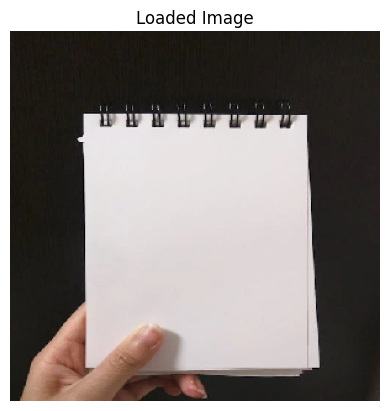

In [261]:
test_img = "Data/Test/paper/paper600.jpg"
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")


In [262]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 99.88 %
GLASS : 0.04 %
METAL : 0.03 %
PAPER : 0.0 %
PLASTIC : 0.04 %
TRASH : 0.02 %


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
Probability: 0.3713704
Classified: metal 



Text(0.5, 1.0, 'Loaded Image')

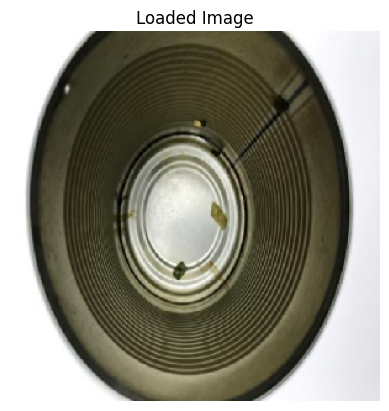

In [263]:
test_img = 'Data/Test/metal/metal361.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [265]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 21.03 %
GLASS : 4.13 %
METAL : 37.14 %
PAPER : 34.75 %
PLASTIC : 1.39 %
TRASH : 1.55 %


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
Probability: 0.32881376
Classified: paper 



Text(0.5, 1.0, 'Loaded Image')

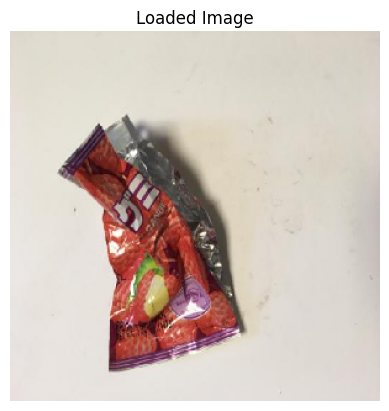

In [266]:
test_img = 'Data/Test/plastic/plastic461.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [267]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 16.94 %
GLASS : 11.37 %
METAL : 24.68 %
PAPER : 32.88 %
PLASTIC : 11.19 %
TRASH : 2.94 %


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Probability: 0.99936086
Classified: cardboard 



Text(0.5, 1.0, 'Loaded Image')

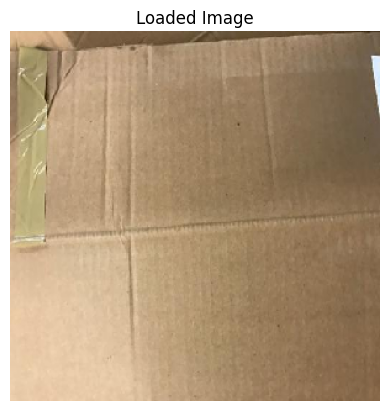

In [268]:
test_img = 'Data/Test/cardboard/cardboard355.jpg'
img = ku.load_img(test_img, target_size = (300,300))
img = ku.img_to_array(img, dtype=np.uint8)
img = np.array(img)/255.0
prediction = model.predict(img[np.newaxis, ...])

#print("Predicted shape",p.shape)
print("Probability:",np.max(prediction[0], axis=-1))
predicted_class = labels[np.argmax(prediction[0], axis=-1)]
print("Classified:",predicted_class,'\n')

plt.axis('off')
plt.imshow(img.squeeze())
plt.title("Loaded Image")

In [269]:
classes = []
probability = []

for i,j in enumerate(prediction[0],0):
  print(labels[i].upper(),':',round(j*100,2),'%')

CARDBOARD : 99.94 %
GLASS : 0.01 %
METAL : 0.01 %
PAPER : 0.0 %
PLASTIC : 0.0 %
TRASH : 0.04 %


# SAVING THE TRAINED MODEL

In [274]:
model.save('modelnew2.h5')